In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

In [2]:
from google.colab import files



uploaded = files.upload()

df=pd.read_csv('train (1).csv')
df.head(5)

Saving train (1).csv to train (1).csv


,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


# **Peprocess for data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [4]:
df.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [5]:
df['Class'].value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

In [6]:
label = LabelEncoder()
label2=LabelEncoder()
df['Artist Name'] = label.fit_transform(df['Artist Name'])
df['Track Name'] = label2.fit_transform(df['Track Name'])

<Axes: >

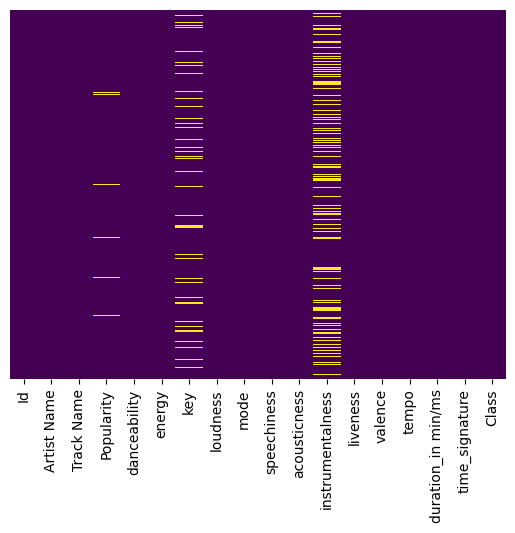

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
numeric_columns = ['key','instrumentalness','Popularity']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

<Axes: >

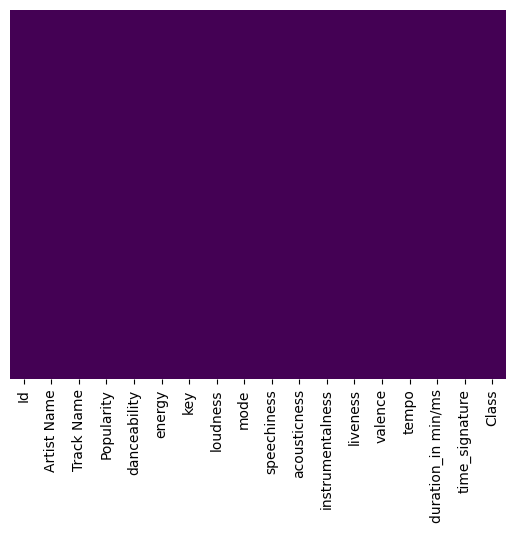

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.drop_duplicates()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,4260,6755,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.003920,0.1060,0.235,152.429,204947.000000,4,9
1,2,6558,4263,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4,6
2,3,5639,11474,44.0,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4,10
3,4,1750,6223,12.0,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3,2
4,5,1377,6441,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.003920,0.2110,0.619,88.311,254145.000000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,14392,4667,4555,47.0,0.607,0.946,1.0,-2.965,1,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4,10
14392,14393,578,2262,27.0,0.435,0.951,8.0,-7.475,1,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4,8
14393,14394,1396,10103,22.0,0.415,0.941,11.0,-4.300,1,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4,10
14394,14395,6721,7634,37.0,0.493,0.986,1.0,-2.279,1,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4,10


<Axes: ylabel='tempo'>

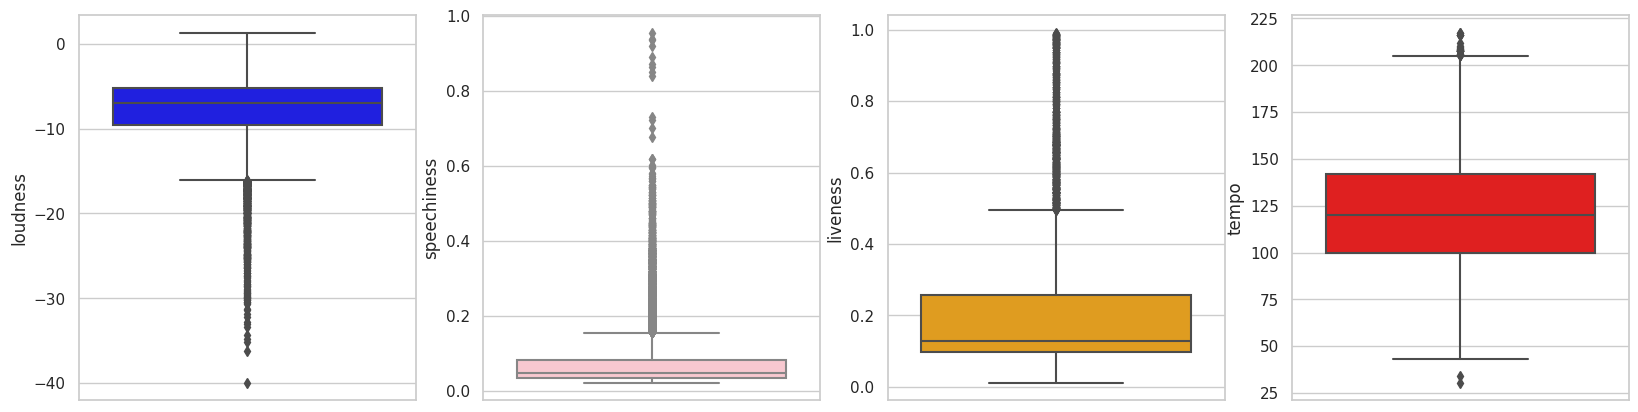

In [11]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 4, figsize=(20,5))
color_palette = ['blue', 'pink', 'orange', 'red']

sns.boxplot(data=df, y='loudness', ax=axes[0], color=color_palette[0])
sns.boxplot(data=df, y='speechiness', ax=axes[1], color=color_palette[1])
sns.boxplot(data=df, y='liveness', ax=axes[2], color=color_palette[2])
sns.boxplot(data=df, y='tempo', ax=axes[3], color=color_palette[3])


In [12]:
import numpy as np

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


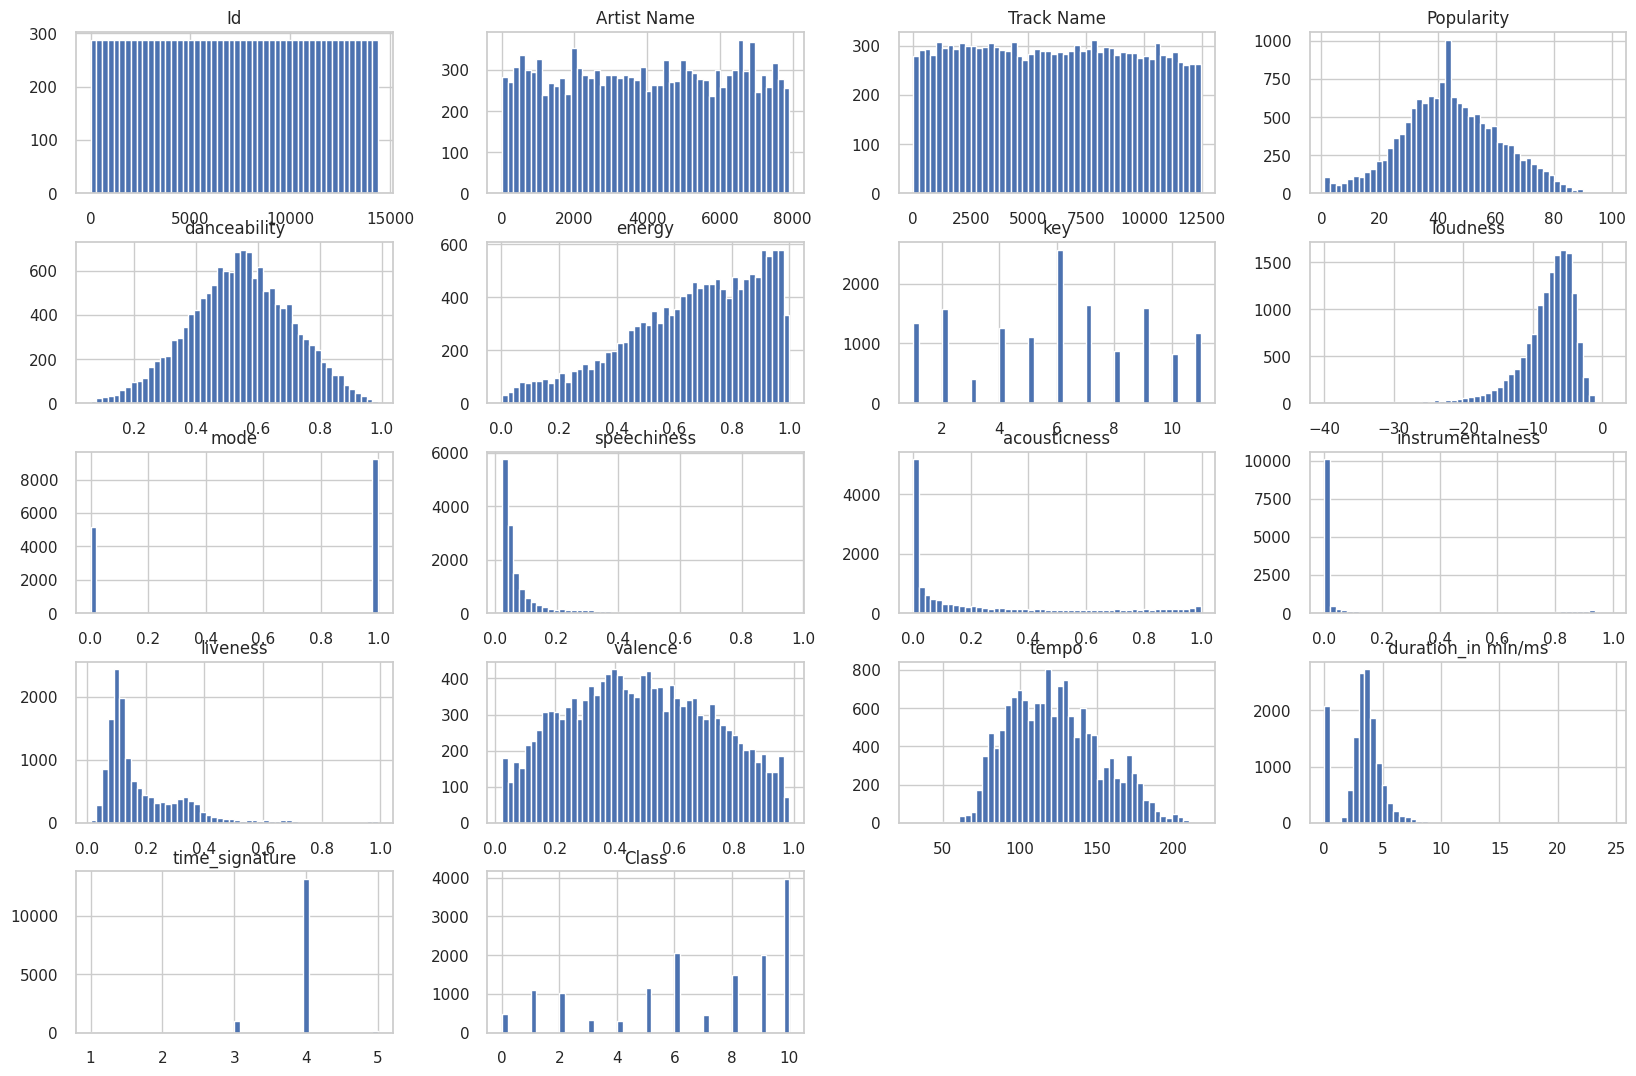

In [ ]:
df.hist(figsize= (20,13),bins=50)
plt.show()

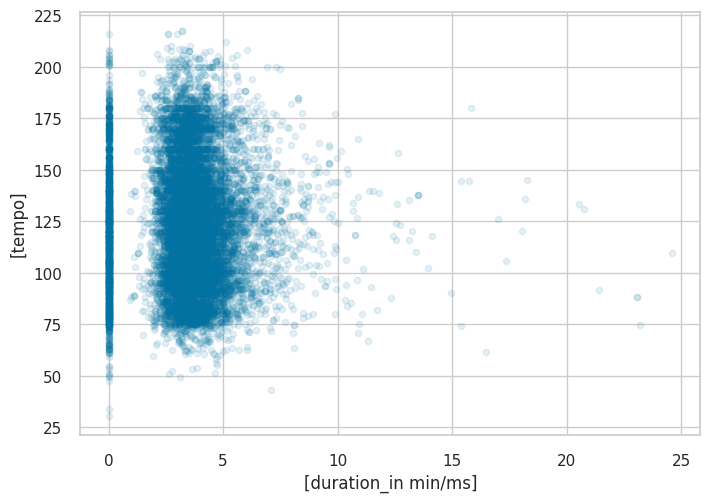

In [ ]:
df.plot(kind='scatter',x=['duration_in min/ms'],y=['tempo'],alpha=0.1)
plt.show()

<Axes: >

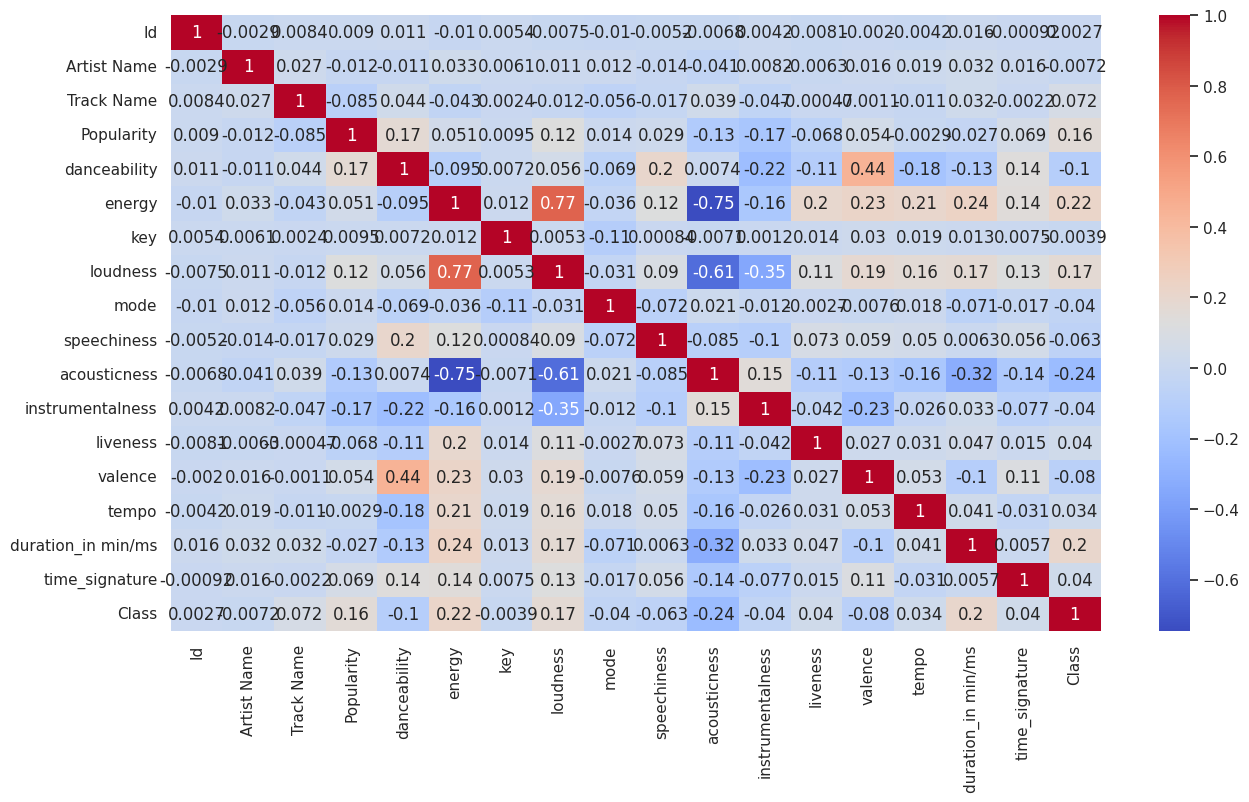

In [13]:
cor=df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(cor, annot=True, cmap="coolwarm")

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 103.7 MB/s eta 0:0

## **PyCaret is a Python open source machine learning library designed to make performing standard tasks in a machine learning project easy**

In [ ]:
from pycaret.classification import setup
from pycaret.classification import compare_models

# set column names as the column number
n_cols = df.shape[1]
df.columns = [str(i) for i in range(n_cols)]
# setup the dataset
grid = setup(data=df, target=df.columns[-1], html=False,verbose=False)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.5250  0.8312  0.5250  0.4935   
lightgbm  Light Gradient Boosting Machine    0.5138  0.8210  0.5138  0.4973   
xgboost         Extreme Gradient Boosting    0.5086  0.8162  0.5086  0.4925   
rf               Random Forest Classifier    0.5035  0.7953  0.5035  0.4842   
et                 Extra Trees Classifier    0.4893  0.7620  0.4893  0.4755   
lda          Linear Discriminant Analysis    0.4625  0.7913  0.4625  0.4241   
qda       Quadratic Discriminant Analysis    0.4482  0.7788  0.4482  0.4293   
nb                            Naive Bayes    0.4398  0.7721  0.4398  0.4071   
ridge                    Ridge Classifier    0.4249  0.0000  0.4249  0.3817   
dt               Decision Tree Classifier    0.3753  0.6206  0.3753  0.3786   
ada                  Ada Boost Classifier    0.3299  0.6774  0.3299  0.3366   
lr                    Logistic Regression    0.3123 

### **Build A model**

In [14]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [15]:
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2)


### **The One-vs-One strategy splits a multi-class classification into one binary classification problem per each pair of classes.**

In [ ]:
ovr=OneVsOneClassifier(GradientBoostingClassifier())

In [ ]:
ovr.fit(x_train,y_train)

OneVsOneClassifier(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='log_loss',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=100,
                                                        n_iter_no_change=None,
                                                        random_state=None,
                                                        subsample=1.0,
                                                        tol=0.0001,
                                                        validation_fraction=0.1,
                                                        verbose=0,
                                                        warm_start=False),
                   n_jobs=None)

In [ ]:
y_pred = ovr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5465277777777777


In [ ]:
rand=OneVsOneClassifier(RandomForestClassifier())

In [ ]:
rand.fit(x_train,y_train)

OneVsOneClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
                                                    oob_score=False,
                                                    random_state=None,
                                                    verbose=0,
                                                    warm_start=False),
                   n_jobs=None)

In [ ]:
y_pred = rand.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5284722222222222


In [ ]:
train_data = lgb.Dataset(x_train, label=y_train)

In [ ]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
model = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002334 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [ ]:
y_pred = model.predict(x_test)
y_pred_binary = [round(x) for x in y_pred]  # Convert probabilities to binary predictions (0 or 1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

Accuracy: 0.09826388888888889


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(x_train, y_train)

0:	learn: 1.7358008	total: 216ms	remaining: 10.6s
1:	learn: 1.6008792	total: 367ms	remaining: 8.8s
2:	learn: 1.4756464	total: 529ms	remaining: 8.28s
3:	learn: 1.3976692	total: 657ms	remaining: 7.56s
4:	learn: 1.3532304	total: 790ms	remaining: 7.11s
5:	learn: 1.3274877	total: 915ms	remaining: 6.71s
6:	learn: 1.3011028	total: 1.07s	remaining: 6.58s
7:	learn: 1.2720113	total: 1.21s	remaining: 6.35s
8:	learn: 1.2538664	total: 1.31s	remaining: 5.96s
9:	learn: 1.2395727	total: 1.44s	remaining: 5.75s
10:	learn: 1.2235822	total: 1.56s	remaining: 5.55s
11:	learn: 1.2088737	total: 1.67s	remaining: 5.3s
12:	learn: 1.1963789	total: 1.78s	remaining: 5.08s
13:	learn: 1.1842990	total: 1.89s	remaining: 4.87s
14:	learn: 1.1761899	total: 2s	remaining: 4.67s
15:	learn: 1.1668686	total: 2.16s	remaining: 4.59s
16:	learn: 1.1571645	total: 2.28s	remaining: 4.42s
17:	learn: 1.1444514	total: 2.39s	remaining: 4.25s
18:	learn: 1.1326167	total: 2.5s	remaining: 4.08s
19:	learn: 1.1221284	total: 2.6s	remaining: 3.9

In [ ]:
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5336805555555556


In [17]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
base_estimators = [
    ('random_forest', RandomForestClassifier()),
    ('gradient_boosting', GradientBoostingClassifier())
]

stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=GradientBoostingClassifier()
)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', stacking_classifier)
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5756944444444444


In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(pipeline, x_train, y_train, cv=3,scoring="accuracy")

array([0.56056265, 0.56551185, 0.54872329])

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [21]:
y_train_pred = cross_val_predict(pipeline, x_train,y_train, cv=3)
confusion_ma=confusion_matrix(y_train,y_train_pred)

### **confusion_matrix**

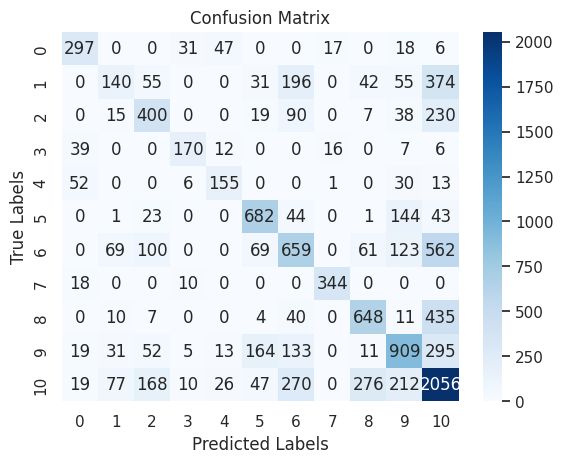

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        84
           1       0.52      0.23      0.32       205
           2       0.54      0.52      0.53       219
           3       0.80      0.79      0.80        72
           4       0.69      0.58      0.63        53
           5       0.66      0.74      0.70       219
           6       0.46      0.46      0.46       426
           7       0.98      0.91      0.94        89
           8       0.63      0.57      0.60       328
           9       0.61      0.50      0.55       387
          10       0.53      0.65      0.58       798

    accuracy                           0.58      2880
   macro avg       0.64      0.61      0.62      2880
weighted avg       0.58      0.58      0.57      2880



In [22]:
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_ma, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

In [23]:
from google.colab import files


uploaded = files.upload()

test=pd.read_csv('test (2).csv')
test.head(5)

Saving test (2).csv to test (2).csv


,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test['Artist Name'] = label_encoder.fit_transform(test['Artist Name'])

In [25]:
label_encoder = LabelEncoder()
test['Track Name'] = label_encoder.fit_transform(test['Track Name'])

In [26]:
numeric_columns = ['key','instrumentalness','Popularity']
test[numeric_columns] = test[numeric_columns].fillna(test[numeric_columns].median())

In [27]:
test.drop_duplicates()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,1159,1714,44.0,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,1205,207,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,1803,1147,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,0.003755,0.1140,0.298,103.971,232533.0,4
3,14400,2609,709,52.0,0.480,0.826,6.0,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,1773,3301,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,0.003755,0.0672,0.805,76.030,118439.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,17992,2655,2483,55.0,0.271,0.866,5.0,-4.072,0,0.0578,0.048900,0.000762,0.1160,0.127,175.665,267987.0,4
3596,17993,600,3271,38.0,0.598,0.690,5.0,-4.758,0,0.3030,0.363000,0.003755,0.0519,0.653,187.934,198300.0,4
3597,17994,508,1122,18.0,0.783,0.820,1.0,-6.102,1,0.0489,0.000540,0.499000,0.0628,0.235,129.015,339213.0,4
3598,17995,1103,2780,38.0,0.443,0.401,5.0,-13.997,1,0.0426,0.263000,0.003755,0.1680,0.751,168.209,182587.0,3


In [29]:
prepared_test = scaler.fit_transform(test)

In [30]:
y_pred = pipeline.predict(prepared_test)

In [31]:
import pandas as pd

my_submission = pd.DataFrame({'Id': test.Id, 'Class': y_pred})

my_submission.to_csv('submission.csv', index=False)
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>